<a href="https://colab.research.google.com/github/vincentwang1517/CS-6501-Data-Privacy/blob/main/HW1/Membership_Inference_Attack_(Graduate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Introduction about training a neural network model to implement image classification task on CIFAR 10 dataset**

**1.1 Getting CIFAR10 dataset from torchvision datasets**

Actually there are 60000 data samples for the whole dataset. We only use 20000 samples for this assignment by randomly sampling. 

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [ ]:
# get cifar10 dataset
# dataset_images: 50000 x 32 x 32 x 3
# dataset_labels: 50000
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 32

dataset = torchvision.datasets.CIFAR10(root='./data', download=True, transform=transform)
#subsample dataset
data_indices = np.arange(0, len(dataset))
dataset = torch.utils.data.Subset(dataset, data_indices[:20000])

print(f"Number of examples: {len(dataset)}, image_size: {dataset[0][0].shape}")

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Number of examples: 20000, image_size: torch.Size([3, 32, 32])


**1.2 Splitting the dataset into train dataset and test dataset[10pts]**

For given a dataset, we would like to randomly split the dataset to train dataset and test dataset as the ratio(train_size/test_size)

In [ ]:
#### output of the function should be#######
#1. trainset: training set (torch.utils.data.Dataset)
#2. testset: testing set (torch.utils.data.Dataset)
def train_test_split(dataset, ratio):

    return trainset, testset

In [ ]:
# split the given dataset into train dataset and test dataset with ratio=0.5
orig_trainset, orig_testset = train_test_split(dataset, 0.5)
print("original trainset size:", len(orig_trainset))
print("original testset size:", len(orig_testset))

original trainset size: 10000
original testset size: 10000


**1.3 Define and train a classifier model for the CIFAR10 image classification task.**

We could like to use a simple Convolutional Neutral Network model as defined below

In [ ]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# define the classifier network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, (3, 3))
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, (3, 3))
        self.fc1 = nn.Linear(2304, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(x, dim=1)
        return x
    
    def predict(self, x):
        return self.forward(x)

Train the defined Covolution Neutral Network model

In [ ]:
model = Net().to(device)

#define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-3)
trainloader = torch.utils.data.DataLoader(orig_trainset, batch_size=batch_size, shuffle=True)

num_epochs = 150

for epoch in tqdm(range(num_epochs), desc="Training"):
    running_loss = 0.0
    correct, total = 0, 0
    for images, labels in trainloader:
        images = images.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, loss: {running_loss/len(trainloader)}, accuracy: {correct/total}")

Training:   1%|          | 1/150 [00:03<07:41,  3.10s/it]

Epoch 1/150, loss: 2.239568289857322, accuracy: 0.1975


Training:   1%|▏         | 2/150 [00:06<07:28,  3.03s/it]

Epoch 2/150, loss: 2.136530113677247, accuracy: 0.3191


Training:   2%|▏         | 3/150 [00:09<07:20,  3.00s/it]

Epoch 3/150, loss: 2.089723763755335, accuracy: 0.3703


Training:   3%|▎         | 4/150 [00:11<07:15,  2.98s/it]

Epoch 4/150, loss: 2.066967214258334, accuracy: 0.39


Training:   3%|▎         | 5/150 [00:14<07:12,  2.98s/it]

Epoch 5/150, loss: 2.0415187293348223, accuracy: 0.4187


Training:   4%|▍         | 6/150 [00:17<07:09,  2.98s/it]

Epoch 6/150, loss: 2.027603632344986, accuracy: 0.4323


Training:   5%|▍         | 7/150 [00:20<07:05,  2.97s/it]

Epoch 7/150, loss: 2.0161695373705784, accuracy: 0.4422


Training:   5%|▌         | 8/150 [00:23<07:04,  2.99s/it]

Epoch 8/150, loss: 1.9979807926823918, accuracy: 0.4629


Training:   6%|▌         | 9/150 [00:26<07:00,  2.98s/it]

Epoch 9/150, loss: 1.9826858260761053, accuracy: 0.478


Training:   7%|▋         | 10/150 [00:29<06:57,  2.98s/it]

Epoch 10/150, loss: 1.9701046459971907, accuracy: 0.4916


Training:   7%|▋         | 11/150 [00:32<06:57,  3.00s/it]

Epoch 11/150, loss: 1.9561335796746202, accuracy: 0.5069


Training:   8%|▊         | 12/150 [00:35<06:53,  3.00s/it]

Epoch 12/150, loss: 1.9450341196486745, accuracy: 0.5185


Training:   9%|▊         | 13/150 [00:38<06:47,  2.98s/it]

Epoch 13/150, loss: 1.9304590651783318, accuracy: 0.5313


Training:   9%|▉         | 14/150 [00:41<06:44,  2.98s/it]

Epoch 14/150, loss: 1.9200939279013929, accuracy: 0.542


Training:  10%|█         | 15/150 [00:44<06:42,  2.98s/it]

Epoch 15/150, loss: 1.904756656089149, accuracy: 0.5578


Training:  11%|█         | 16/150 [00:47<06:37,  2.97s/it]

Epoch 16/150, loss: 1.8930327149625785, accuracy: 0.5707


Training:  11%|█▏        | 17/150 [00:50<06:34,  2.97s/it]

Epoch 17/150, loss: 1.886482461572836, accuracy: 0.5761


Training:  12%|█▏        | 18/150 [00:53<06:32,  2.97s/it]

Epoch 18/150, loss: 1.8637543714846285, accuracy: 0.5979


Training:  13%|█▎        | 19/150 [00:56<06:30,  2.98s/it]

Epoch 19/150, loss: 1.828988884203731, accuracy: 0.6364


Training:  13%|█▎        | 20/150 [00:59<06:27,  2.98s/it]

Epoch 20/150, loss: 1.8046806334687497, accuracy: 0.6612


Training:  14%|█▍        | 21/150 [01:02<06:22,  2.97s/it]

Epoch 21/150, loss: 1.7784868634927768, accuracy: 0.6871


Training:  15%|█▍        | 22/150 [01:05<06:22,  2.99s/it]

Epoch 22/150, loss: 1.754908537712341, accuracy: 0.7133


Training:  15%|█▌        | 23/150 [01:08<06:17,  2.97s/it]

Epoch 23/150, loss: 1.7415118632606044, accuracy: 0.7255


Training:  16%|█▌        | 24/150 [01:11<06:14,  2.97s/it]

Epoch 24/150, loss: 1.726134326892158, accuracy: 0.74


Training:  17%|█▋        | 25/150 [01:14<06:12,  2.98s/it]

Epoch 25/150, loss: 1.7164446542057366, accuracy: 0.7488


Training:  17%|█▋        | 26/150 [01:17<06:09,  2.98s/it]

Epoch 26/150, loss: 1.7076379776762698, accuracy: 0.7588


Training:  18%|█▊        | 27/150 [01:20<06:06,  2.98s/it]

Epoch 27/150, loss: 1.6974481904087737, accuracy: 0.7679


Training:  19%|█▊        | 28/150 [01:23<06:04,  2.98s/it]

Epoch 28/150, loss: 1.6877771810220834, accuracy: 0.7767


Training:  19%|█▉        | 29/150 [01:26<06:00,  2.98s/it]

Epoch 29/150, loss: 1.6877082609140073, accuracy: 0.7782


Training:  20%|██        | 30/150 [01:29<05:57,  2.98s/it]

Epoch 30/150, loss: 1.6785798826918434, accuracy: 0.7856


Training:  21%|██        | 31/150 [01:32<05:54,  2.98s/it]

Epoch 31/150, loss: 1.6733498847522674, accuracy: 0.7906


Training:  21%|██▏       | 32/150 [01:35<05:52,  2.99s/it]

Epoch 32/150, loss: 1.673649094736995, accuracy: 0.7906


Training:  22%|██▏       | 33/150 [01:38<05:51,  3.01s/it]

Epoch 33/150, loss: 1.671295332451598, accuracy: 0.7929


Training:  23%|██▎       | 34/150 [01:41<05:49,  3.01s/it]

Epoch 34/150, loss: 1.668900743460122, accuracy: 0.7938


Training:  23%|██▎       | 35/150 [01:44<05:46,  3.02s/it]

Epoch 35/150, loss: 1.6652749555941206, accuracy: 0.7972


Training:  24%|██▍       | 36/150 [01:47<05:41,  3.00s/it]

Epoch 36/150, loss: 1.659422853122504, accuracy: 0.8038


Training:  25%|██▍       | 37/150 [01:50<05:38,  3.00s/it]

Epoch 37/150, loss: 1.6551973701665958, accuracy: 0.8071


Training:  25%|██▌       | 38/150 [01:53<05:34,  2.99s/it]

Epoch 38/150, loss: 1.6557374701332361, accuracy: 0.807


Training:  26%|██▌       | 39/150 [01:56<05:29,  2.97s/it]

Epoch 39/150, loss: 1.6517267189086817, accuracy: 0.8098


Training:  27%|██▋       | 40/150 [01:59<05:25,  2.96s/it]

Epoch 40/150, loss: 1.6558542982838786, accuracy: 0.8055


Training:  27%|██▋       | 41/150 [02:02<05:22,  2.96s/it]

Epoch 41/150, loss: 1.6477157601152366, accuracy: 0.8142


Training:  28%|██▊       | 42/150 [02:05<05:19,  2.96s/it]

Epoch 42/150, loss: 1.636467486143874, accuracy: 0.8282


Training:  29%|██▊       | 43/150 [02:08<05:18,  2.98s/it]

Epoch 43/150, loss: 1.6176964440665687, accuracy: 0.8459


Training:  29%|██▉       | 44/150 [02:11<05:12,  2.95s/it]

Epoch 44/150, loss: 1.6004690971618263, accuracy: 0.863


Training:  30%|███       | 45/150 [02:14<05:09,  2.95s/it]

Epoch 45/150, loss: 1.5926942688207657, accuracy: 0.8698


Training:  31%|███       | 46/150 [02:16<05:05,  2.93s/it]

Epoch 46/150, loss: 1.5820177260298318, accuracy: 0.8809


Training:  31%|███▏      | 47/150 [02:19<05:01,  2.93s/it]

Epoch 47/150, loss: 1.5782109278078658, accuracy: 0.8849


Training:  32%|███▏      | 48/150 [02:22<04:58,  2.93s/it]

Epoch 48/150, loss: 1.5731924924606713, accuracy: 0.8902


Training:  33%|███▎      | 49/150 [02:25<04:55,  2.92s/it]

Epoch 49/150, loss: 1.5677056434436347, accuracy: 0.8952


Training:  33%|███▎      | 50/150 [02:28<04:53,  2.93s/it]

Epoch 50/150, loss: 1.5630810622590037, accuracy: 0.9003


Training:  34%|███▍      | 51/150 [02:31<04:50,  2.93s/it]

Epoch 51/150, loss: 1.5613015048420087, accuracy: 0.902


Training:  35%|███▍      | 52/150 [02:34<04:47,  2.94s/it]

Epoch 52/150, loss: 1.5656974993574733, accuracy: 0.8973


Training:  35%|███▌      | 53/150 [02:37<04:46,  2.95s/it]

Epoch 53/150, loss: 1.5591352899996236, accuracy: 0.9031


Training:  36%|███▌      | 54/150 [02:40<04:42,  2.94s/it]

Epoch 54/150, loss: 1.5566009538242231, accuracy: 0.906


Training:  37%|███▋      | 55/150 [02:43<04:40,  2.96s/it]

Epoch 55/150, loss: 1.5565431712153621, accuracy: 0.9069


Training:  37%|███▋      | 56/150 [02:46<04:39,  2.97s/it]

Epoch 56/150, loss: 1.5574296133967633, accuracy: 0.9056


Training:  38%|███▊      | 57/150 [02:49<04:37,  2.98s/it]

Epoch 57/150, loss: 1.5523005449733795, accuracy: 0.9102


Training:  39%|███▊      | 58/150 [02:52<04:33,  2.97s/it]

Epoch 58/150, loss: 1.5549535195286663, accuracy: 0.9068


Training:  39%|███▉      | 59/150 [02:55<04:29,  2.96s/it]

Epoch 59/150, loss: 1.5544348551442448, accuracy: 0.9071


Training:  40%|████      | 60/150 [02:58<04:27,  2.97s/it]

Epoch 60/150, loss: 1.5503181002010553, accuracy: 0.9124


Training:  41%|████      | 61/150 [03:01<04:23,  2.97s/it]

Epoch 61/150, loss: 1.5517951901347493, accuracy: 0.9102


Training:  41%|████▏     | 62/150 [03:04<04:21,  2.97s/it]

Epoch 62/150, loss: 1.5512135264972529, accuracy: 0.9111


Training:  42%|████▏     | 63/150 [03:07<04:19,  2.98s/it]

Epoch 63/150, loss: 1.5494571844228922, accuracy: 0.9126


Training:  43%|████▎     | 64/150 [03:10<04:15,  2.97s/it]

Epoch 64/150, loss: 1.5486248442159294, accuracy: 0.9133


Training:  43%|████▎     | 65/150 [03:13<04:11,  2.96s/it]

Epoch 65/150, loss: 1.5461490116180323, accuracy: 0.9154


Training:  44%|████▍     | 66/150 [03:16<04:08,  2.95s/it]

Epoch 66/150, loss: 1.5448824685221663, accuracy: 0.9166


Training:  45%|████▍     | 67/150 [03:19<04:04,  2.94s/it]

Epoch 67/150, loss: 1.5425248446936806, accuracy: 0.9185


Training:  45%|████▌     | 68/150 [03:21<04:01,  2.94s/it]

Epoch 68/150, loss: 1.5482278471937576, accuracy: 0.9139


Training:  46%|████▌     | 69/150 [03:24<03:58,  2.95s/it]

Epoch 69/150, loss: 1.5486100062775536, accuracy: 0.9137


Training:  47%|████▋     | 70/150 [03:27<03:55,  2.95s/it]

Epoch 70/150, loss: 1.548470530266198, accuracy: 0.9131


Training:  47%|████▋     | 71/150 [03:30<03:51,  2.93s/it]

Epoch 71/150, loss: 1.5492929608677142, accuracy: 0.9125


Training:  48%|████▊     | 72/150 [03:33<03:49,  2.95s/it]

Epoch 72/150, loss: 1.5452452517165163, accuracy: 0.9165


Training:  49%|████▊     | 73/150 [03:36<03:47,  2.95s/it]

Epoch 73/150, loss: 1.5460183666156122, accuracy: 0.9158


Training:  49%|████▉     | 74/150 [03:39<03:44,  2.95s/it]

Epoch 74/150, loss: 1.5453859830435854, accuracy: 0.9165


Training:  50%|█████     | 75/150 [03:42<03:40,  2.94s/it]

Epoch 75/150, loss: 1.5407134488748666, accuracy: 0.9209


Training:  51%|█████     | 76/150 [03:45<03:38,  2.95s/it]

Epoch 76/150, loss: 1.5442044974896854, accuracy: 0.9173


Training:  51%|█████▏    | 77/150 [03:48<03:35,  2.95s/it]

Epoch 77/150, loss: 1.5420364179550268, accuracy: 0.9197


Training:  52%|█████▏    | 78/150 [03:51<03:32,  2.95s/it]

Epoch 78/150, loss: 1.54266614236009, accuracy: 0.9187


Training:  53%|█████▎    | 79/150 [03:54<03:28,  2.93s/it]

Epoch 79/150, loss: 1.5417614851515895, accuracy: 0.9196


Training:  53%|█████▎    | 80/150 [03:57<03:25,  2.94s/it]

Epoch 80/150, loss: 1.5435747810826896, accuracy: 0.918


Training:  54%|█████▍    | 81/150 [04:00<03:22,  2.94s/it]

Epoch 81/150, loss: 1.5413631574033548, accuracy: 0.9196


Training:  55%|█████▍    | 82/150 [04:03<03:19,  2.93s/it]

Epoch 82/150, loss: 1.5487507665500093, accuracy: 0.9128


Training:  55%|█████▌    | 83/150 [04:06<03:16,  2.93s/it]

Epoch 83/150, loss: 1.541856396312531, accuracy: 0.9197


Training:  56%|█████▌    | 84/150 [04:09<03:14,  2.94s/it]

Epoch 84/150, loss: 1.541658857759957, accuracy: 0.9198


Training:  57%|█████▋    | 85/150 [04:12<03:11,  2.94s/it]

Epoch 85/150, loss: 1.5387374212185796, accuracy: 0.9227


Training:  57%|█████▋    | 86/150 [04:14<03:07,  2.93s/it]

Epoch 86/150, loss: 1.53975872947766, accuracy: 0.9217


Training:  58%|█████▊    | 87/150 [04:17<03:04,  2.93s/it]

Epoch 87/150, loss: 1.5391809342387386, accuracy: 0.9222


Training:  59%|█████▊    | 88/150 [04:20<03:02,  2.94s/it]

Epoch 88/150, loss: 1.539970737676651, accuracy: 0.9212


Training:  59%|█████▉    | 89/150 [04:23<03:00,  2.95s/it]

Epoch 89/150, loss: 1.541641992121078, accuracy: 0.9198


Training:  60%|██████    | 90/150 [04:26<02:57,  2.96s/it]

Epoch 90/150, loss: 1.541017364770079, accuracy: 0.9208


Training:  61%|██████    | 91/150 [04:29<02:54,  2.95s/it]

Epoch 91/150, loss: 1.5392459722372671, accuracy: 0.9225


Training:  61%|██████▏   | 92/150 [04:32<02:51,  2.95s/it]

Epoch 92/150, loss: 1.5413564397885016, accuracy: 0.9201


Training:  62%|██████▏   | 93/150 [04:35<02:47,  2.94s/it]

Epoch 93/150, loss: 1.538803399180452, accuracy: 0.9223


Training:  63%|██████▎   | 94/150 [04:38<02:44,  2.94s/it]

Epoch 94/150, loss: 1.5362327944356413, accuracy: 0.9249


Training:  63%|██████▎   | 95/150 [04:41<02:41,  2.94s/it]

Epoch 95/150, loss: 1.5385450326596586, accuracy: 0.9224


Training:  64%|██████▍   | 96/150 [04:44<02:38,  2.93s/it]

Epoch 96/150, loss: 1.5337268742509544, accuracy: 0.9281


Training:  65%|██████▍   | 97/150 [04:47<02:34,  2.92s/it]

Epoch 97/150, loss: 1.532812812457831, accuracy: 0.9281


Training:  65%|██████▌   | 98/150 [04:50<02:32,  2.93s/it]

Epoch 98/150, loss: 1.532855770839289, accuracy: 0.9283


Training:  66%|██████▌   | 99/150 [04:53<02:29,  2.92s/it]

Epoch 99/150, loss: 1.5387928230693926, accuracy: 0.9231


Training:  67%|██████▋   | 100/150 [04:56<02:25,  2.92s/it]

Epoch 100/150, loss: 1.5346508007080029, accuracy: 0.9272


Training:  67%|██████▋   | 101/150 [04:58<02:23,  2.92s/it]

Epoch 101/150, loss: 1.5353783620432162, accuracy: 0.9265


Training:  68%|██████▊   | 102/150 [05:01<02:20,  2.92s/it]

Epoch 102/150, loss: 1.5343320464935546, accuracy: 0.9267


Training:  69%|██████▊   | 103/150 [05:04<02:17,  2.92s/it]

Epoch 103/150, loss: 1.5341416342189897, accuracy: 0.9274


Training:  69%|██████▉   | 104/150 [05:07<02:14,  2.93s/it]

Epoch 104/150, loss: 1.5372931016519809, accuracy: 0.9237


Training:  70%|███████   | 105/150 [05:10<02:12,  2.94s/it]

Epoch 105/150, loss: 1.5348407685185392, accuracy: 0.9264


Training:  71%|███████   | 106/150 [05:13<02:09,  2.93s/it]

Epoch 106/150, loss: 1.5311188800647235, accuracy: 0.9301


Training:  71%|███████▏  | 107/150 [05:16<02:05,  2.93s/it]

Epoch 107/150, loss: 1.5319052588063689, accuracy: 0.929


Training:  72%|███████▏  | 108/150 [05:19<02:03,  2.93s/it]

Epoch 108/150, loss: 1.5359767321199655, accuracy: 0.9254


Training:  73%|███████▎  | 109/150 [05:22<01:59,  2.92s/it]

Epoch 109/150, loss: 1.532043764766413, accuracy: 0.9291


Training:  73%|███████▎  | 110/150 [05:25<01:56,  2.92s/it]

Epoch 110/150, loss: 1.5320647406501893, accuracy: 0.9287


Training:  74%|███████▍  | 111/150 [05:28<01:54,  2.93s/it]

Epoch 111/150, loss: 1.5322304986917172, accuracy: 0.929


Training:  75%|███████▍  | 112/150 [05:31<01:51,  2.93s/it]

Epoch 112/150, loss: 1.5338226522500522, accuracy: 0.9273


Training:  75%|███████▌  | 113/150 [05:34<01:48,  2.93s/it]

Epoch 113/150, loss: 1.5332740431014722, accuracy: 0.928


Training:  76%|███████▌  | 114/150 [05:37<01:45,  2.93s/it]

Epoch 114/150, loss: 1.536804533233277, accuracy: 0.9241


Training:  77%|███████▋  | 115/150 [05:40<01:43,  2.95s/it]

Epoch 115/150, loss: 1.537726562244062, accuracy: 0.9234


Training:  77%|███████▋  | 116/150 [05:43<01:40,  2.96s/it]

Epoch 116/150, loss: 1.5338782125387709, accuracy: 0.9274


Training:  78%|███████▊  | 117/150 [05:46<01:38,  2.99s/it]

Epoch 117/150, loss: 1.5313520526733642, accuracy: 0.9298


Training:  79%|███████▊  | 118/150 [05:49<01:35,  2.99s/it]

Epoch 118/150, loss: 1.5301316001544745, accuracy: 0.9308


Training:  79%|███████▉  | 119/150 [05:52<01:32,  2.98s/it]

Epoch 119/150, loss: 1.5316924306150443, accuracy: 0.9294


Training:  80%|████████  | 120/150 [05:54<01:28,  2.96s/it]

Epoch 120/150, loss: 1.5314403505751881, accuracy: 0.9296


Training:  81%|████████  | 121/150 [05:57<01:25,  2.95s/it]

Epoch 121/150, loss: 1.5293593745642957, accuracy: 0.9319


Training:  81%|████████▏ | 122/150 [06:00<01:22,  2.94s/it]

Epoch 122/150, loss: 1.5326422666208432, accuracy: 0.9285


Training:  82%|████████▏ | 123/150 [06:03<01:19,  2.94s/it]

Epoch 123/150, loss: 1.532387921223625, accuracy: 0.9287


Training:  83%|████████▎ | 124/150 [06:06<01:16,  2.93s/it]

Epoch 124/150, loss: 1.5303786692147057, accuracy: 0.9311


Training:  83%|████████▎ | 125/150 [06:09<01:13,  2.93s/it]

Epoch 125/150, loss: 1.529733845981927, accuracy: 0.9313


Training:  84%|████████▍ | 126/150 [06:12<01:10,  2.94s/it]

Epoch 126/150, loss: 1.5285354148084744, accuracy: 0.9324


Training:  85%|████████▍ | 127/150 [06:15<01:07,  2.94s/it]

Epoch 127/150, loss: 1.5276006277376852, accuracy: 0.9336


Training:  85%|████████▌ | 128/150 [06:18<01:04,  2.93s/it]

Epoch 128/150, loss: 1.5289827200551382, accuracy: 0.9322


Training:  86%|████████▌ | 129/150 [06:21<01:01,  2.94s/it]

Epoch 129/150, loss: 1.5297585337306745, accuracy: 0.9315


Training:  87%|████████▋ | 130/150 [06:24<00:58,  2.95s/it]

Epoch 130/150, loss: 1.5315001559333679, accuracy: 0.9299


Training:  87%|████████▋ | 131/150 [06:27<00:55,  2.94s/it]

Epoch 131/150, loss: 1.531335983413477, accuracy: 0.9299


Training:  88%|████████▊ | 132/150 [06:30<00:53,  2.95s/it]

Epoch 132/150, loss: 1.530027891119448, accuracy: 0.9311


Training:  89%|████████▊ | 133/150 [06:33<00:50,  2.95s/it]

Epoch 133/150, loss: 1.5293939563032157, accuracy: 0.9323


Training:  89%|████████▉ | 134/150 [06:36<00:47,  2.94s/it]

Epoch 134/150, loss: 1.5309644564272116, accuracy: 0.93


Training:  90%|█████████ | 135/150 [06:38<00:44,  2.94s/it]

Epoch 135/150, loss: 1.5285104124690778, accuracy: 0.9322


Training:  91%|█████████ | 136/150 [06:41<00:41,  2.95s/it]

Epoch 136/150, loss: 1.5281619309617307, accuracy: 0.9331


Training:  91%|█████████▏| 137/150 [06:44<00:38,  2.96s/it]

Epoch 137/150, loss: 1.5286693961475604, accuracy: 0.9322


Training:  92%|█████████▏| 138/150 [06:47<00:35,  2.96s/it]

Epoch 138/150, loss: 1.5283402193087738, accuracy: 0.9328


Training:  93%|█████████▎| 139/150 [06:50<00:32,  2.96s/it]

Epoch 139/150, loss: 1.5281789866499245, accuracy: 0.9331


Training:  93%|█████████▎| 140/150 [06:53<00:29,  2.95s/it]

Epoch 140/150, loss: 1.5263893840411982, accuracy: 0.9345


Training:  94%|█████████▍| 141/150 [06:56<00:26,  2.95s/it]

Epoch 141/150, loss: 1.528504334318752, accuracy: 0.9331


Training:  95%|█████████▍| 142/150 [06:59<00:23,  2.95s/it]

Epoch 142/150, loss: 1.5256590500426368, accuracy: 0.9353


Training:  95%|█████████▌| 143/150 [07:02<00:20,  2.96s/it]

Epoch 143/150, loss: 1.5285100076145257, accuracy: 0.9329


Training:  96%|█████████▌| 144/150 [07:05<00:17,  2.96s/it]

Epoch 144/150, loss: 1.5282069928349016, accuracy: 0.9327


Training:  97%|█████████▋| 145/150 [07:08<00:14,  2.98s/it]

Epoch 145/150, loss: 1.526378825449715, accuracy: 0.9349


Training:  97%|█████████▋| 146/150 [07:11<00:11,  2.97s/it]

Epoch 146/150, loss: 1.5274158228700534, accuracy: 0.9335


Training:  98%|█████████▊| 147/150 [07:14<00:08,  2.96s/it]

Epoch 147/150, loss: 1.5276933443812897, accuracy: 0.9335


Training:  99%|█████████▊| 148/150 [07:17<00:05,  2.95s/it]

Epoch 148/150, loss: 1.5248252968437754, accuracy: 0.9364


Training:  99%|█████████▉| 149/150 [07:20<00:02,  2.94s/it]

Epoch 149/150, loss: 1.5262204682865081, accuracy: 0.935


Training: 100%|██████████| 150/150 [07:23<00:00,  2.96s/it]

Epoch 150/150, loss: 1.5240763319186128, accuracy: 0.9368


Evaluate the accutracy of the model on the test dataset

Given a specified data sample, using the pre trained model to predict the classification of the data sample

In [ ]:
### after finish training the model, you can use it to predict the classification for a given image ###
image, label = orig_testset[0]
image = image[None, :, :, :].to(device)
### get the predict probility ###
model.eval()
with torch.no_grad():
    predicted_prob = model.predict(image)
    prediction = torch.max(predicted_prob .data, 1)[1]
print("predict probility：", predicted_prob)
print("predict label: ", prediction)
print("true label: ", label)

predict probility： tensor([[1.0000e+00, 4.6596e-26, 1.4768e-25, 4.6596e-26, 1.0383e-15, 4.6596e-26,
         4.6596e-26, 4.6596e-26, 5.6337e-24, 4.6596e-26]], device='cuda:0')
predict label:  tensor([0], device='cuda:0')
true label:  0


Evaluate the predict accuracy of the pre train model on the test dataset

In [ ]:
correct = 0
total = 0
testloader = torch.utils.data.DataLoader(orig_testset, batch_size=batch_size, shuffle=False)

with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)

        predicted = model.predict(images)
        predicted = torch.max(predicted.data, 1)[1]
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

eval_acc = 100 * correct // total
print(f'Test accuracy: {eval_acc} %')

Test accuracy: 57 %


# **2. Introduction about Membership Inference Attack**
Generally, for a pre-trained model,we could not know the information about the train dataset,which is sensitive data. For example, for the model provided by Google, Amazon, etc, we just use the API for our own task. In this case, for given a data sample, we could not know whether it belongs to the train dataset of the pre-trained model.

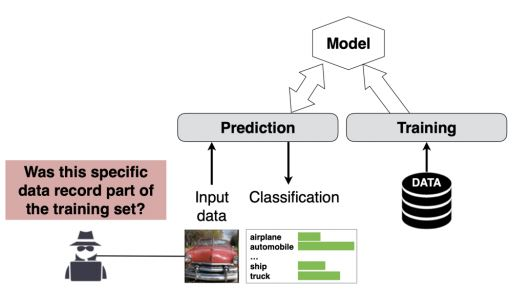

In this assignment, we get the pre-trained CNN model for CIFAR10. But, the original train dataset is unknown in the real case.

For Membership Inference Attack, we would like use some tricky methods to attack the pre-trained model to access the information whether a specific data sample belongs to the train dataset of a pre-trained model.

Here we would like to use another neutral network named membership attack model to solve this problem.

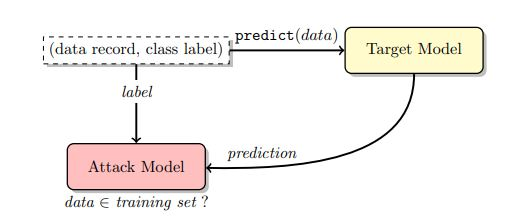

The basic idea is that we would like use another Attack Model. As the figure above shown, for a given specific data, we feed the data to the Target Model to get the probility prediction. Then we use the probability prediction as the feature vector and the data class label as the input to feed into the Attack Model. Finally, the Attack Model will output the probability about wheter this given data belongs to the train dataset of the Target Model

**2.1 Define Membership Attack Model**

We would like to use a simple dense neutral network as the attack model. The input of the attack model is the 10-dimensional probability output from the pre-trained model for the data sample and the class label of the data sample. The output for the attack model is the probility of this data sample belongs to the train dataset

In [ ]:
class MIA_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(11, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, feature_vectors, labels):
        # feature vector represents 10-dimension probability outputs from the pre-trained model
        # label represents the data sample label
        x = torch.concat((feature_vectors, labels[:, None]), dim=1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.sigmoid(x)
    
    def predict(self, feature_vectors, labels):
        outputs = self.forward(feature_vectors, labels).squeeze()
        return (outputs > 0.5).long()

In [ ]:
membership_attack_model = MIA_Model().to(device)

**The question is how could we train this attack model. Since we do not know the train dataset for the pre-trained model in the real case, thus we could not generate the dataset to train the attack model.** 


# **3. Train the Attack Model**

In the real case, we could only obtain the model structure  of the Target Model. Here we use the pre train model as the Target Model. Assume we could obtain some unsensitive images data or we could synthesis some images data, which has the same distribution with sensitive train dataset. We define these unsensitive dataset as the known dataset.


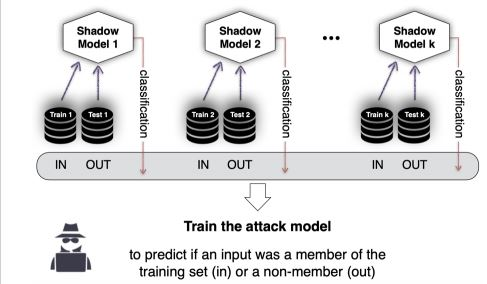

The idea of training the Attack Model is that we would like to define a bunch of new neural network, named Shadow Model. Shadow Model has the same model structure with the Target Model, which we have already known. We would like split the known dataset we obtained to train and test dataset to train the Shadow Model. Since we know the train dataset and test dataset for the Shadow model, we could use these datasets to form a new dataset to train the Attack Model.   

The new dataset to train the Attack Model should includes three kinds of information. To be specific, for a given data, it should include Shadow Model probability prediction of this data,  class label and whether this data in/out the train dataset of Shadow Model. 

**3.1 Generate the known image dataset**

These known image dataset should have the same data distribution characteristic with the train dataset of pre-trained model.
To be simplified, in this assignemnt, we could just use the original test dataset as the known image dataset, since it is disjoint with the original train dataset but has the same distribution. 

In [ ]:
known_dataset = orig_testset
print(f"Generated disjoint image dataset - Number of examples: {len(known_dataset)}")

Generated disjoint image dataset - Number of examples: 10000


**3.2 Define a new CNN shadow model [5pts]**

As the description above, the shadow should has use the same model structure of the pre train model as intialization. To be simplicity, in this assignment, we only need to use one shadow model.


In [ ]:
class ShadowModel(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):

        return x
    
    def predict(self, x):
        return self.forward(x)

In [ ]:
shadow_model = ShadowModel().to(device)

**3.3 Train the Shadow model[10pts]**

We use the known image dataset obtained before to train the shadow model.

In [ ]:
# get the train dataset and test dataset for the shadow model using the known image dataset
# we could use the train_test_split_function defined as before with ration=0.5
shadow_trainset, shadow_testset = train_test_split(known_dataset, 0.5)
print("shadow_trainset_size:", len(shadow_trainset))
print("shadow_testset_size:", len(shadow_testset))

shadow_trainset_size: 5000
shadow_testset_size: 5000


In [ ]:
# Train the shadow model


**3.4 Generate the new dataset for training the memory attack model[15pts]**



In [ ]:
# generate data set for memory attack model
# we shoud generate the In dataset and Out dataset sequetially and then concantate the In dataset and Out dataset by Random Shuffle.
## output of the function#######
# 1.dataset_fvs(feature vectors) represents the probability output of the model
# 2.dataset_labels represent the class label
# 3.dataset_targets represent whether the data in/out the train dataset of the model (in->1  out->0)
def generate_attack_dataset(model, trainset, testset):
    
    ################Generate the In dataset###########


    ################Generate the Out dataset############


    ###############Concatenate the In dataset and Out dataset by Random Shuffle############


    return dataset_fvs, dataset_labels, dataset_targets


In [ ]:
# generate the train dataset for the attack model
attack_train_fvs, attack_train_labels, attack_train_targets = generate_attack_dataset(shadow_model, shadow_trainset, shadow_testset)
print(attack_train_fvs.shape)
print(attack_train_labels.shape)
print(attack_train_labels)

torch.Size([10000, 10])
torch.Size([10000])
tensor([0, 9, 5,  ..., 0, 4, 4])


In [ ]:
class AttackDataset(torch.utils.data.Dataset):
  def __init__(self, feature_vectors, labels, targets):
        self.feature_vectors = feature_vectors
        self.labels = labels
        self.targets = targets

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.feature_vectors)

  def __getitem__(self, index):
        'Generates one sample of data'
        return self.feature_vectors[index], self.labels[index], self.targets[index]

In [ ]:
attack_trainset = AttackDataset(attack_train_fvs, attack_train_labels, attack_train_targets)

**3.5 Evaluate the attack performance before training the model[10pts]**

To make comparision, before training the attack model, you could firstly evaluate the attack performance.

To evaluate the performance, you could directly jump to the Section 4 to run the code and get the evaluate accuracy and write the accuracy in the textbox below. The evaluate accuracy without training should be around 0.5 and explain why?


Evaluate Accuracy without training the attack model:

Reason:

**3.5 Train the attack model[10pts]**

In [ ]:
#train the attack model using the generated attack train dataset


## **4.Evaluate the attack performance of the membership attack model on the pre-trained model**




**4.1 Generate Evaluation dataset**

We randomly extract 2000 images from original dataset to form the evaluation dataset: 1000 from the orginial train dataset, 1000 from the original test dataset.



In [ ]:
eval_trainset, _ = train_test_split(orig_trainset, 0.1)
eval_testset, _ = train_test_split(orig_testset, 0.1)

print("evaluate_train_images_size:", len(eval_trainset))
print("evaluate_test_labels_size:", len(eval_testset))

evaluate_train_images_size: 1000
evaluate_test_labels_size: 1000


4.2 Generate the Evaluation dataset for Attack Model

In [ ]:
attack_eval_fvs, attack_eval_labels, attack_eval_targets = generate_attack_dataset(model, eval_trainset, eval_testset)
attack_testset = AttackDataset(attack_eval_fvs, attack_eval_labels, attack_eval_targets)

In [ ]:
correct = 0
total = 0
attack_testloader = torch.utils.data.DataLoader(attack_testset, batch_size=batch_size, shuffle=False)

with torch.no_grad():
    for fvs, labels, targets in attack_testloader:
        fvs = fvs.to(device)
        labels = labels.to(device)
        targets = targets.to(device)

        predicted = membership_attack_model.predict(fvs, labels)
        total += labels.size(0)
        correct += (predicted == targets).sum().item()

attack_acc = 100 * correct // total
print(f'Test accuracy: {attack_acc} %')

Test accuracy: 69 %


# **5. Questions [10pts]**

After finish this assignment, you should have a deep understanding about membership inference attack. Please answer the following questions: 

**1. Why the attack model could successfully detect the In/Out information?**
> A. The In and Out datasets come from different data distributions. \
> B. The accuracy on the training set (In dataset) is higher than the accuracy on the testing set (Out dataset) since the target model has memorized the training data. \
> C. The attack model has been trained on the same dataset that used for training the target model. \

**2. Why the attack model trained on the shadow model could successfully attack the target model? (Multiple choices)**
> A. The shadow model and the target model have the same model architecture. \
> B. The performance of the shadow model is comparable to the target model. \
> C. The shadow model has trained on more examples than the target model. \
> D. The data used for training the shadow model and the target model come from the same data distribution. \

**3. Which of the following statements are true about membership inference attack? (Multiple choices)**
> A. The attack accuracy will be higher if the training data for the shadow model and the target model are sampled from different data distributions. \
> B. The attacker's goal is to infer whether a data sample is used for training the target model. \
> C. The shadow model is trained to imitate the behavior of the target model. \
> D. The feature vectors for training the attack model are the probability predictions output by the shadow model. \

**4. Based on the previous questions and observations from the implementation, which of following methods may reduce the risk of membership inference attack? (Multiple choices)**
> A. Hiding information of the target model's architecture. \
> B. Improving target model's performance. \
> C. Using some regularization techniques during training to prevent model overfitting. \
> D. Using a bigger and more complex model architecture for the target model. 

## Your Answer:
1. 
2. 
3. 
4. 

# **6. Open Questions [30pts]**
For all the questions, it suffices to describe the idea and provide intuition why you think the idea would work. It is not required to run experiment to validate your ideas. You can also use those as the starting point of your project.

**1. Please describe two scenarios when membership inference attack would be a threat (one example given in the class is health care models, please come up with two other scenarios).**

**2. What are the assets, threat, and adversaries in membership inference attack?**

**3. The white-box setting reveals more information to the attacker, thus potentially can make the attacker more powerful. If the attacker has white-box access to the model, design a method to make the membership inference attack more powerful. Describe how you will utilize the white-box information.**

**4. How can membership inference attack be done in the federated learning setting? Describe how the attack can be implemented.**

**5. Assuming the attacker can insert some data to the training data (a special kind of poison attack), describe a method that the attacker can leverage this ability to make membership inference attack more powerful.**

## Your Answer